# Evaluando modelos de Machine Learning

In [71]:
#Importaciones
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Preparamos dataset

In [72]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()

df_stroke = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')
df_stroke['age']=df_stroke['age'].round(0).astype(int)



#Reemplazamos nulos
df_stroke.fillna(df_stroke.mean(),inplace=True);
df_stroke.isnull().values.any();
df_stroke.isnull().sum;



Comprobamos tipos de datos de cada columna

In [73]:
cats = list(df_stroke.select_dtypes(include=['object','bool']) )
nums = list(df_stroke.select_dtypes(include=['int64','float64']))
print(cats)
print(nums)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['id', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


### Previa anterior, usamos todos los valores del dataset y los normalizamos y numerizamos

In [74]:
# Clasificamos datos para el encoding
encoder = []
onehot = []

for col in cats:
   if len(df_stroke[col].unique()) == 2:
        encoder.append(col)
   else:
        onehot.append(col)

print(encoder)
print(onehot)

['ever_married', 'Residence_type']
['gender', 'work_type', 'smoking_status']


In [75]:
df_labencoded = df_stroke.copy()

for col in encoder:
    df_labencoded[col] = df_labencoded[col].astype('category').cat.codes
df_labencoded.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,Female,61,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,Male,80,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,Female,49,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,Female,79,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [76]:
# Comprobamos la correlación de las features con el target
df_labencoded.corr().round(2)

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.01,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.68,0.01,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.16,-0.01,0.17,0.16,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.11,0.00,0.16,0.04,0.13
ever_married,0.01,0.68,0.16,0.11,1.00,0.01,0.16,0.34,0.11
Residence_type,-0.00,0.01,-0.01,0.00,0.01,1.00,-0.00,-0.00,0.02
avg_glucose_level,0.00,0.24,0.17,0.16,0.16,-0.00,1.00,0.17,0.13
bmi,0.00,0.33,0.16,0.04,0.34,-0.00,0.17,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.11,0.02,0.13,0.04,1.00


In [77]:
df = df_stroke.drop(['id'], axis=1)
nums.remove('id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Borramos outliers

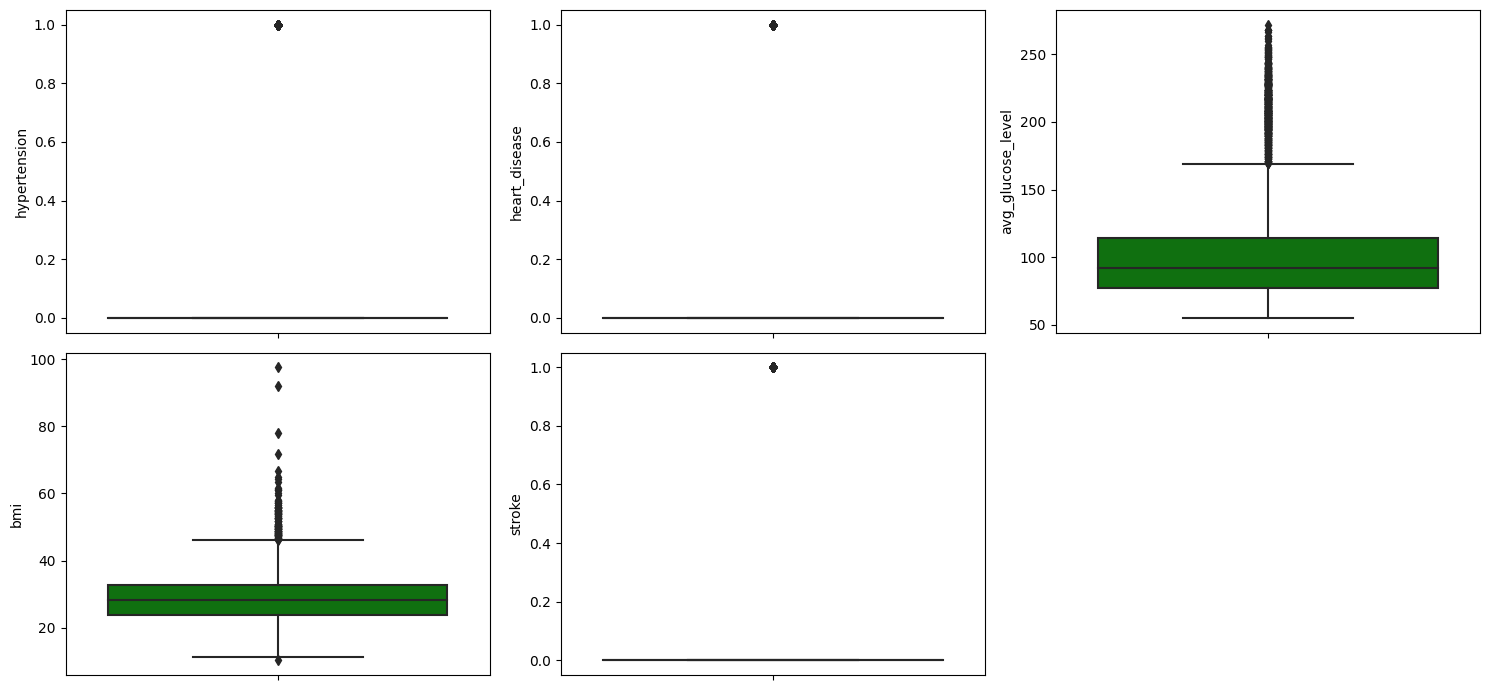

In [78]:
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[nums[i]],color='green',orient='v')
    plt.tight_layout()

In [79]:
outlier = ['avg_glucose_level', 'bmi']

In [80]:
# Calcula el valor del primer cuartil (25%)
Q1 = df[outlier].quantile(0.25)

# Calcula el valor del tercer cuartil (75%)
Q3 = df[outlier].quantile(0.75)

# Calcula la amplitud intercuartílica (IQR)
IQR = Q3 - Q1

# Selecciona solo las filas del dataframe que no tengan valores de la variable "outlier"
# por debajo del límite inferior (Q1 - 1.5*IQR) o por encima del límite superior (Q3 + 1.5*IQR)
# any(axis=1) indica que se deben eliminar las filas que tengan al menos un valor de "outlier"
# dentro de los límites establecidos
df = df[~((df[outlier]<(Q1-1.5*IQR))|(df[outlier]>(Q3+1.5*IQR))).any(axis=1)]

# Reinicia el índice del dataframe para que sea consecutivo
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
1,Male,74,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
2,Female,69,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
3,Female,59,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
4,Female,78,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
4386,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
4387,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
4388,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
4389,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Convertimos columnas categóricas a numéricas

In [81]:
# onehot encoding para categóricas
df = pd.get_dummies(df)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
6,74,1,1,70.09,27.400000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
7,69,0,0,94.39,22.800000,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
8,59,0,0,76.15,28.893237,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
9,78,0,0,58.57,24.200000,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


## Modelado

Pasos previos

In [82]:
# separamos feature y target
X = df.drop(columns = ['stroke'])
y = df['stroke']

Usamos la técnica SMOTE (Synthetic Minority Over-sampling Technique) para el oversampling

In [83]:
# using SMOTE Techniqe
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=111)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(4391, 21)
Shape of X after SMOTE:(8452, 21) 


Target Class distributuion before SMOTE:
0    0.962423
1    0.037577
Name: stroke, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: stroke, dtype: float64


Dividimos datos para el entrenamiento y datos para el testing

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    test_size = .2,
    random_state = 111)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6761, 21), (6761,), (1691, 21), (1691,))

Normalizamos datos usando StandardScaler

In [85]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### Usamos KNN para el modelado

In [86]:
from sklearn.neighbors import KNeighborsClassifier
baseline_model = KNeighborsClassifier()
baseline_model.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
y_pred = baseline_model.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,baseline_model.predict(X_train)))

baseline_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(baseline_report).transpose()

Testing-set Accuracy score is: 0.9751626256652868
Training-set Accuracy score is: 0.9782576541931667


,precision,recall,f1-score,support
No Stroke,0.969586,0.979115,0.974328,814.000000
Stroke,0.980437,0.971494,0.975945,877.000000
accuracy,0.975163,0.975163,0.975163,0.975163
macro avg,0.975012,0.975305,0.975136,1691.000000
weighted avg,0.975214,0.975163,0.975166,1691.000000


<AxesSubplot: >

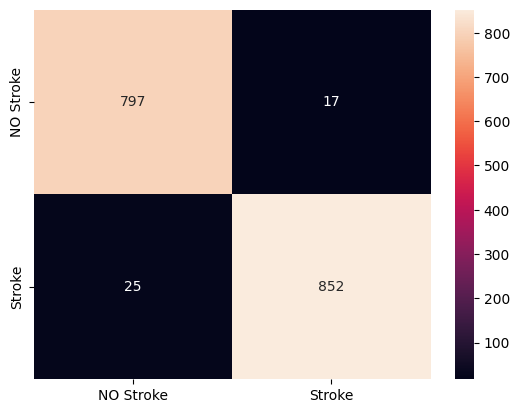

In [89]:
# Confussion matrix
baseline_cf = confusion_matrix(y_test, y_pred)
sns.heatmap(baseline_cf, annot=True, fmt="d", xticklabels=['NO Stroke', 'Stroke'], yticklabels=['NO Stroke', 'Stroke'])

### Comparación, usamos Forward selection

In [118]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

df_stroke = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')
df_stroke['age']=df_stroke['age'].round(0).astype(int)

#Reemplazamos nulos
df_stroke.fillna(df_stroke.mean(),inplace=True)
df_stroke.isnull().values.any()
df_stroke.isnull().sum

display(df_stroke)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Borramos columnas innecesarias

In [119]:
df = df_stroke.drop(['id'], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Borramos outliers

In [112]:
outlier = ['avg_glucose_level', 'bmi']

In [113]:
# Calcula el valor del primer cuartil (25%)
Q1 = df[outlier].quantile(0.25)

# Calcula el valor del tercer cuartil (75%)
Q3 = df[outlier].quantile(0.75)

# Calcula la amplitud intercuartílica (IQR)
IQR = Q3 - Q1

# Selecciona solo las filas del dataframe que no tengan valores de la variable "outlier"
# por debajo del límite inferior (Q1 - 1.5*IQR) o por encima del límite superior (Q3 + 1.5*IQR)
# any(axis=1) indica que se deben eliminar las filas que tengan al menos un valor de "outlier"
# dentro de los límites establecidos
df = df[~((df[outlier]<(Q1-1.5*IQR))|(df[outlier]>(Q3+1.5*IQR))).any(axis=1)]

# Reinicia el índice del dataframe para que sea consecutivo
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
1,Male,74,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
2,Female,69,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
3,Female,59,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
4,Female,78,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
4386,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
4387,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
4388,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
4389,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [114]:
# onehot encoding para categóricas
df = pd.get_dummies(df)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
6,74,1,1,70.09,27.400000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
7,69,0,0,94.39,22.800000,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
8,59,0,0,76.15,28.893237,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
9,78,0,0,58.57,24.200000,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [123]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [124]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=17,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 2)

sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

('age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'ever_married_No',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Rural',
 'Residence_type_Urban')

In [125]:
X = X.loc[:, sfs.k_feature_names_]
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
2,80,0,1,105.92,32.500000,0,1,0,0,1,0,0,1,0,0,1,0
6,74,1,1,70.09,27.400000,0,1,0,0,1,0,0,1,0,0,1,0
7,69,0,0,94.39,22.800000,1,0,0,1,0,0,0,1,0,0,0,1
8,59,0,0,76.15,28.893237,1,0,0,0,1,0,0,1,0,0,1,0
9,78,0,0,58.57,24.200000,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80,1,0,83.75,28.893237,1,0,0,0,1,0,0,1,0,0,0,1
5106,81,0,0,125.20,40.000000,1,0,0,0,1,0,0,0,1,0,0,1
5107,35,0,0,82.99,30.600000,1,0,0,0,1,0,0,0,1,0,1,0
5108,51,0,0,166.29,25.600000,0,1,0,0,1,0,0,1,0,0,1,0


## Modelado

Usamos la técnica SMOTE (Synthetic Minority Over-sampling Technique) para el oversampling

In [133]:
# using SMOTE Techniqe
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=111)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(4391, 17)
Shape of X after SMOTE:(8452, 17) 


Target Class distributuion before SMOTE:
0    0.962423
1    0.037577
Name: stroke, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: stroke, dtype: float64


In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    test_size = .2,
    random_state = 111)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6761, 17), (6761,), (1691, 17), (1691,))

Normalizamos datos usando StandardScaler

In [135]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### Usamos KNN para el modelado

In [136]:
from sklearn.neighbors import KNeighborsClassifier
baseline_model = KNeighborsClassifier()
baseline_model.fit(X_train, y_train)

KNeighborsClassifier()

In [137]:
y_pred = baseline_model.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,baseline_model.predict(X_train)))

baseline_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(baseline_report).transpose()

Testing-set Accuracy score is: 0.9680662329982259
Training-set Accuracy score is: 0.9730809051915397


,precision,recall,f1-score,support
No Stroke,0.967980,0.965602,0.966790,814.000000
Stroke,0.968146,0.970353,0.969248,877.000000
accuracy,0.968066,0.968066,0.968066,0.968066
macro avg,0.968063,0.967978,0.968019,1691.000000
weighted avg,0.968066,0.968066,0.968065,1691.000000


<AxesSubplot: >

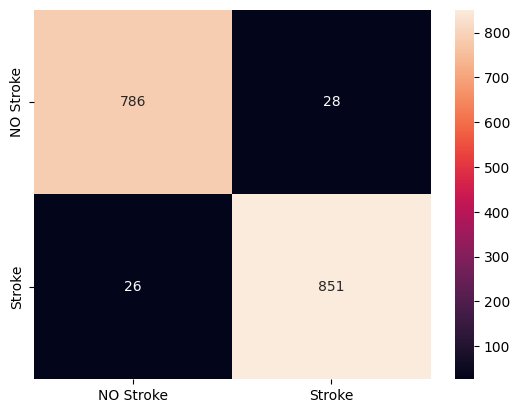

In [139]:
# Confussion matrix
baseline_cf = confusion_matrix(y_test, y_pred)
sns.heatmap(baseline_cf, annot=True, fmt="d", xticklabels=['NO Stroke', 'Stroke'], yticklabels=['NO Stroke', 'Stroke'])

## Conclusiones

Usando forward selection tenemos una precisión de 0.967 para los casos No-Stroke y 0.968 para los casos Stroke.

Usando la manera anterior, con todas las features (que parecen bastante necesarias en este complejo problema) tenemos 0.969 para los No-Stroke y 0.980 para los casos Stroke.

Concluímos que la mejor manera en este caso sigue siendo usar todas las features.